In [1]:
# import libraries

import theano
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import keras # Test out Theano when time permits as well
from PIL import Image
            
%matplotlib inline

from tensorflow.keras.preprocessing import image



/home/admin1/anaconda3/envs/newenvt/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# load file

file = open('Pickel_classifier/model.pkl', 'rb')
classifier=pickle.load(file)
# test_set=pickle.load(file)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


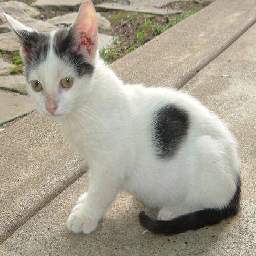

In [12]:
Image.open('dataset/training_set/cats/cat.3.jpg').resize((256,256))

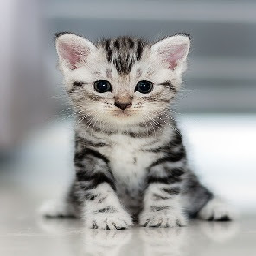

In [13]:
Image.open('dataset/training_set/cats/catM.jpg').resize((256,256))

#### img = img/255

If you see the values of X you can see a variety of values between 0- 255 . Its because every pixel has different density of black and white. 
But with the wide range of values it becomes difficult for a training model to learn ( sometimes memorize ).

How to resolve this And you guessed it right . 
You can normalize the data. We can use Keras normalize here also . 
But well we already know all values are having range between 0-255 so we can just divide it by 255 and get all values scaled between 0 -1



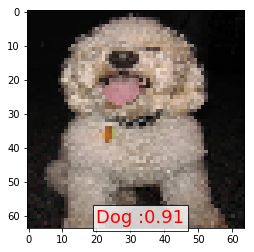

In [14]:
#Prediction of image

img1 = image.load_img('dataset/test_set/dogs/dog.4003.jpg', target_size = (64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

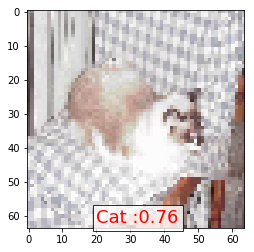

In [17]:
#Prediction of image

# cat.4011.jpg

img1 = image.load_img('dataset/test_set/cats/cat.4011.jpg', target_size = (64, 64))
img = image.img_to_array(img1)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()